In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3
x1, x2, g

(array([[2.71454911],
        [0.78095761],
        [1.44811135],
        [7.22827697],
        [0.99901086],
        [5.75403384],
        [5.46653258],
        [4.65769751],
        [6.10702096],
        [2.29256412],
        [2.03537843],
        [1.48608503],
        [2.81032746],
        [7.68909305],
        [3.40941064],
        [7.91859637],
        [3.17537118],
        [2.31877235],
        [6.92942343],
        [0.72903102],
        [5.25187624],
        [5.92400926],
        [2.72405497],
        [4.08466283],
        [2.77695864],
        [1.42619828],
        [6.47091012],
        [5.22770557],
        [5.25324091],
        [5.33202195],
        [0.21079906],
        [2.62208351],
        [4.19760322],
        [0.37944509],
        [6.82389838],
        [5.45285371],
        [0.80147793],
        [4.2431907 ],
        [5.45582459],
        [2.97252236],
        [0.64288976],
        [7.76314518],
        [4.54019443],
        [1.43992573],
        [2.56935447],
        [0

In [4]:
C1 = np.where(g >= 1)
C0 = np.where(g < -1)
print(C1)

(array([ 3,  6,  7, 13, 14, 15, 18, 20, 22, 26, 31, 35, 37, 38, 39, 41, 49,
       50, 56, 58, 59, 60, 63, 66, 67, 69, 70, 73, 76, 83, 86, 89, 91, 92,
       96]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [5]:
C1 = np.where(g >= 1)[0]
print(C1)

[ 3  6  7 13 14 15 18 20 22 26 31 35 37 38 39 41 49 50 56 58 59 60 63 66
 67 69 70 73 76 83 86 89 91 92 96]


In [6]:
C1 = np.where(g >= 1)[0]
C0 = np.where(g < -1)[0]
print(C1.shape)
print(C0.shape)

(35,)
(38,)


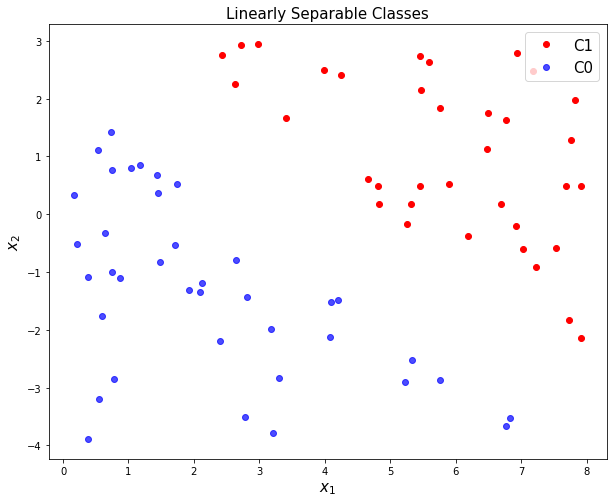

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 1.0, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.7, label = 'C0')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [8]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [9]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]

for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T
print(w)

[[-15.        ]
 [  5.57218768]
 [  6.80835766]]


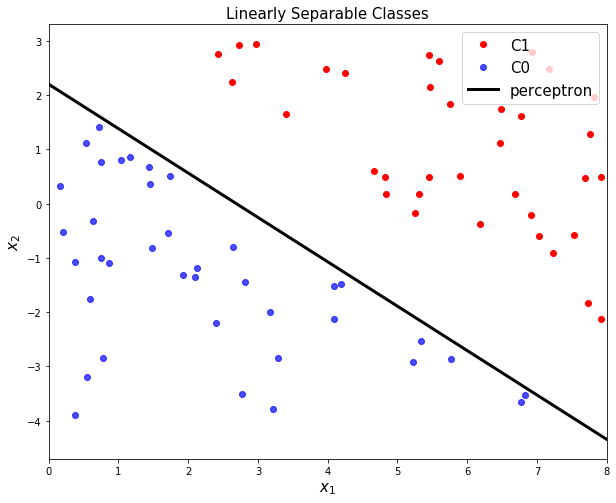

In [10]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 1.0, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.7, label = 'C0')
plt.plot(x1p, x2p, c='k', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.xlim([0,8])
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()


In [11]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [12]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
clf.predict([[3, -2]])

array([-1.])

In [14]:
clf.predict([[6, 2]])

array([1.])

In [15]:
clf.coef_

array([[6.00407565, 8.79664964]])

In [16]:
clf.intercept_

array([-19.])

In [17]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

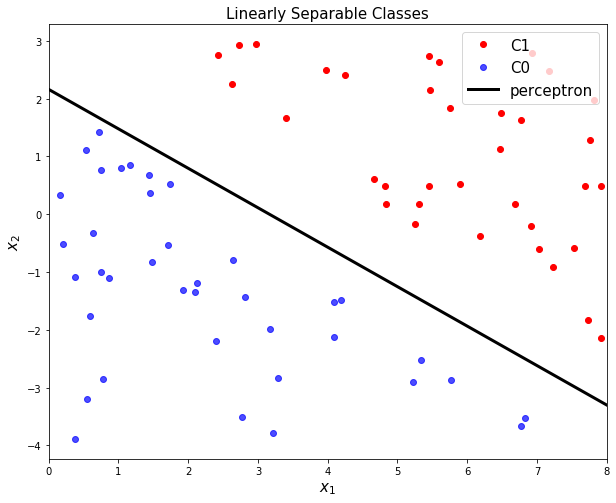

In [19]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 1.0, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.7, label = 'C0')
plt.plot(x1p, x2p, c='k', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.xlim([0,8])
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()